<a href="https://colab.research.google.com/github/AI4Finance-Foundation/FinRL/blob/master/Stock_NeurIPS2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='1.3'></a>
## 2.3. Import Packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

/home/ga_aiot/anaconda3/envs/finrl/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


<a id='1.4'></a>
## 2.4. Create Folders

In [3]:
from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])



<a id='2'></a>
# Part 3. Download Data
Yahoo Finance provides stock data, financial news, financial reports, etc. Yahoo Finance is free.
* FinRL uses a class **YahooDownloader** in FinRL-Meta to fetch data via Yahoo Finance API
* Call Limit: Using the Public API (without authentication), you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).



-----
class YahooDownloader:
    Retrieving daily stock data from
    Yahoo Finance API

    Attributes
    ----------
        start_date : str
            start date of the data (modified from config.py)
        end_date : str
            end date of the data (modified from config.py)
        ticker_list : list
            a list of stock tickers (modified from config.py)

    Methods
    -------
    fetch_data()


In [4]:
# from config.py, TRAIN_START_DATE is a string
TRAIN_START_DATE
# from config.py, TRAIN_END_DATE is a string
TRAIN_END_DATE

'2020-07-31'

In [7]:
df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = config_tickers.DOW_30_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


Shape of DataFrame:  (58421, 8)


In [17]:
print(config_tickers.DOW_30_TICKER)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


In [18]:
df.shape

(58421, 8)

In [19]:
df.sort_values(['date','tic'],ignore_index=True).head()
df.shape

(58421, 8)

# Part 4: Preprocess Data
We need to check for missing data and do feature engineering to convert the data point into a state.
* **Adding technical indicators**. In practical trading, various information needs to be taken into account, such as historical prices, current holding shares, technical indicators, etc. Here, we demonstrate two trend-following technical indicators: MACD and RSI.
* **Adding turbulence index**. Risk-aversion reflects whether an investor prefers to protect the capital. It also influences one's trading strategy when facing different market volatility level. To control the risk in a worst-case scenario, such as financial crisis of 2007–2008, FinRL employs the turbulence index that measures extreme fluctuation of asset price.

In [20]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=True,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preproce

/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preproce

/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preproce

/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preproce

/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preproce

/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preprocessors.py:159: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/home/ga_aiot/FinRL/finrl/meta/preprocessor/preproce

Successfully added technical indicators
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1990, 8)
Successfully added vix


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


Successfully added turbulence index


In [21]:
processed.head()

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_7,rsi_14,cci_14,dx_30,close_7_sma,close_14_sma,vix,turbulence
0,2014-01-06,19.194643,19.528570,19.057142,17.099754,412610800,AAPL,0,0.0,17.211548,16.865677,0.0,0.0,66.666667,100.0,17.099754,17.099754,13.55,0.0
1,2014-01-06,114.470001,114.919998,113.120003,88.447121,2838100,AMGN,0,0.0,17.211548,16.865677,0.0,0.0,66.666667,100.0,88.447121,88.447121,13.55,0.0
2,2014-01-06,89.699997,90.250000,89.379997,78.413528,2844700,AXP,0,0.0,17.211548,16.865677,0.0,0.0,66.666667,100.0,78.413528,78.413528,13.55,0.0
3,2014-01-06,139.399994,139.759995,137.800003,118.295082,4196500,BA,0,0.0,17.211548,16.865677,0.0,0.0,66.666667,100.0,118.295082,118.295082,13.55,0.0
4,2014-01-06,90.190002,90.300003,88.379997,68.235741,5233900,CAT,0,0.0,17.211548,16.865677,0.0,0.0,66.666667,100.0,68.235741,68.235741,13.55,0.0


In [22]:
processed.shape

(57710, 19)

In [23]:
processed.dtypes

date             object
open            float64
high            float64
low             float64
close           float64
volume            int64
tic              object
day               int64
macd            float64
boll_ub         float64
boll_lb         float64
rsi_7           float64
rsi_14          float64
cci_14          float64
dx_30           float64
close_7_sma     float64
close_14_sma    float64
vix             float64
turbulence      float64
dtype: object

In [26]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))
processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

[('2014-01-06', 'AAPL'), ('2014-01-06', 'AMGN'), ('2014-01-06', 'AXP'), ('2014-01-06', 'BA'), ('2014-01-06', 'CAT'), ('2014-01-06', 'CRM'), ('2014-01-06', 'CSCO'), ('2014-01-06', 'CVX'), ('2014-01-06', 'DIS'), ('2014-01-06', 'GS'), ('2014-01-06', 'HD'), ('2014-01-06', 'HON'), ('2014-01-06', 'IBM'), ('2014-01-06', 'INTC'), ('2014-01-06', 'JNJ'), ('2014-01-06', 'JPM'), ('2014-01-06', 'KO'), ('2014-01-06', 'MCD'), ('2014-01-06', 'MMM'), ('2014-01-06', 'MRK'), ('2014-01-06', 'MSFT'), ('2014-01-06', 'NKE'), ('2014-01-06', 'PG'), ('2014-01-06', 'TRV'), ('2014-01-06', 'UNH'), ('2014-01-06', 'V'), ('2014-01-06', 'VZ'), ('2014-01-06', 'WBA'), ('2014-01-06', 'WMT'), ('2014-01-07', 'AAPL'), ('2014-01-07', 'AMGN'), ('2014-01-07', 'AXP'), ('2014-01-07', 'BA'), ('2014-01-07', 'CAT'), ('2014-01-07', 'CRM'), ('2014-01-07', 'CSCO'), ('2014-01-07', 'CVX'), ('2014-01-07', 'DIS'), ('2014-01-07', 'GS'), ('2014-01-07', 'HD'), ('2014-01-07', 'HON'), ('2014-01-07', 'IBM'), ('2014-01-07', 'INTC'), ('2014-01-07

In [25]:
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_7,rsi_14,cci_14,dx_30,close_7_sma,close_14_sma,vix,turbulence
0,2014-01-06,AAPL,19.194643,19.528570,19.057142,17.099754,412610800.0,0.0,0.0,17.211548,16.865677,0.0,0.0,66.666667,100.0,17.099754,17.099754,13.55,0.0
1,2014-01-06,AMGN,114.470001,114.919998,113.120003,88.447121,2838100.0,0.0,0.0,17.211548,16.865677,0.0,0.0,66.666667,100.0,88.447121,88.447121,13.55,0.0
2,2014-01-06,AXP,89.699997,90.250000,89.379997,78.413528,2844700.0,0.0,0.0,17.211548,16.865677,0.0,0.0,66.666667,100.0,78.413528,78.413528,13.55,0.0
3,2014-01-06,BA,139.399994,139.759995,137.800003,118.295082,4196500.0,0.0,0.0,17.211548,16.865677,0.0,0.0,66.666667,100.0,118.295082,118.295082,13.55,0.0
4,2014-01-06,CAT,90.190002,90.300003,88.379997,68.235741,5233900.0,0.0,0.0,17.211548,16.865677,0.0,0.0,66.666667,100.0,68.235741,68.235741,13.55,0.0
5,2014-01-06,CRM,55.200001,55.240002,54.029999,54.230000,2532700.0,0.0,0.0,17.211548,16.865677,0.0,0.0,66.666667,100.0,54.230000,54.230000,13.55,0.0
6,2014-01-06,CSCO,21.959999,22.230000,21.930000,16.592573,34150300.0,0.0,0.0,17.211548,16.865677,0.0,0.0,66.666667,100.0,16.592573,16.592573,13.55,0.0
7,2014-01-06,CVX,124.589996,124.800003,123.519997,83.969727,4252300.0,0.0,0.0,17.211548,16.865677,0.0,0.0,66.666667,100.0,83.969727,83.969727,13.55,0.0
8,2014-01-06,DIS,76.529999,76.839996,75.489998,69.778381,6816200.0,0.0,0.0,17.211548,16.865677,0.0,0.0,66.666667,100.0,69.778381,69.778381,13.55,0.0
9,2014-01-06,GS,179.149994,181.130005,178.880005,153.547623,2954000.0,0.0,0.0,17.211548,16.865677,0.0,0.0,66.666667,100.0,153.547623,153.547623,13.55,0.0


<a id='4'></a>
# Part 5. Build A Market Environment in OpenAI Gym-style
The training process involves observing stock price change, taking an action and reward's calculation. By interacting with the market environment, the agent will eventually derive a trading strategy that may maximize (expected) rewards.

Our market environment, based on OpenAI Gym, simulates stock markets with historical market data.

## Data Split
We split the data into training set and testing set as follows:

Training data period: 2009-01-01 to 2020-07-01

Trading data period: 2020-07-01 to 2021-10-31


In [16]:
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

NameError: name 'processed_full' is not defined

In [15]:
train.tail()

NameError: name 'train' is not defined

In [15]:
trade.head()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_7,rsi_14,cci_14,dx_30,close_7_sma,close_14_sma,vix,turbulence
0,2018-02-23,AAPL,43.417500,43.912498,43.384998,41.826965,135249600.0,4.0,0.180299,42.525478,36.525943,71.511033,60.977472,99.430123,1.555020,40.982932,39.474383,16.49,22.570161
0,2018-02-23,AMGN,183.630005,186.789993,182.770004,160.829437,4163400.0,4.0,0.290141,168.807348,144.251153,69.693744,59.200130,106.526591,9.894645,157.692089,153.744864,16.49,22.570161
0,2018-02-23,AXP,97.779999,98.839996,97.550003,92.017105,2440600.0,4.0,-0.157592,95.293547,83.838991,66.543094,56.463301,106.451726,9.273952,90.529614,88.447388,16.49,22.570161
0,2018-02-23,BA,358.179993,358.769989,353.070007,341.572235,3355400.0,4.0,8.139369,348.613052,313.036277,64.704811,62.219545,84.901446,14.457927,338.566463,330.885051,16.49,22.570161
0,2018-02-23,CAT,159.399994,162.479996,159.220001,143.500488,4450800.0,4.0,-0.384855,148.403577,129.531120,64.513065,56.567615,134.643367,14.100698,139.653187,136.933055,16.49,22.570161


In [16]:
INDICATORS

['macd',
 'boll_ub',
 'boll_lb',
 'rsi_7',
 'rsi_14',
 'cci_14',
 'dx_30',
 'close_7_sma',
 'close_14_sma']

In [17]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 28, State Space: 309


In [18]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)


## Environment for Training



In [19]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


<a id='5'></a>
# Part 6: Train DRL Agents
* The DRL algorithms are from **Stable Baselines 3**. Users are also encouraged to try **ElegantRL** and **Ray RLlib**.
* FinRL includes fine-tuned standard DRL algorithms, such as DQN, DDPG, Multi-Agent DDPG, PPO, SAC, A2C and TD3. We also allow users to
design their own DRL algorithms by adapting these DRL algorithms.

In [20]:
agent = DRLAgent(env = env_train)

if_using_a2c = False
if_using_ddpg = False
if_using_ppo = True
if_using_td3 = False
if_using_sac = False


### Agent Training: 5 algorithms (A2C, DDPG, PPO, TD3, SAC)


### Agent 1: A2C


In [21]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

if if_using_a2c:
  # set up logger
  tmp_path = RESULTS_DIR + '/a2c'
  new_logger_a2c = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_a2c.set_logger(new_logger_a2c)


{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cuda device


In [22]:
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=50000) if if_using_a2c else None

### Agent 2: DDPG

In [23]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

if if_using_ddpg:
  # set up logger
  tmp_path = RESULTS_DIR + '/ddpg'
  new_logger_ddpg = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ddpg.set_logger(new_logger_ddpg)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cuda device


In [24]:
trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=50000) if if_using_ddpg else None

### Agent 3: PPO

In [25]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
    "device":"cpu"
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

if if_using_ppo:
  # set up logger
  tmp_path = RESULTS_DIR + '/ppo'
  new_logger_ppo = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ppo.set_logger(new_logger_ppo)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128, 'device': 'cpu'}
Using cpu device
Logging to results/ppo


In [26]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=50000) if if_using_ppo else None

----------------------------------
| time/              |           |
|    fps             | 200       |
|    iterations      | 1         |
|    time_elapsed    | 10        |
|    total_timesteps | 2048      |
| train/             |           |
|    reward          | 2.0997086 |
----------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 197         |
|    iterations           | 2           |
|    time_elapsed         | 20          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014354646 |
|    clip_fraction        | 0.194       |
|    clip_range           | 0.2         |
|    entropy_loss         | -39.8       |
|    explained_variance   | -0.00603    |
|    learning_rate        | 0.00025     |
|    loss                 | 6.26        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0227     |
|    reward  

day: 2517, episode: 10
begin_total_asset: 1000000.00
end_total_asset: 2535602.75
total_reward: 1535602.75
total_cost: 211248.21
total_trades: 65769
Sharpe: 0.523
---------------------------------------
| time/                   |           |
|    fps                  | 194       |
|    iterations           | 12        |
|    time_elapsed         | 126       |
|    total_timesteps      | 24576     |
| train/                  |           |
|    approx_kl            | 0.0213006 |
|    clip_fraction        | 0.201     |
|    clip_range           | 0.2       |
|    entropy_loss         | -40.3     |
|    explained_variance   | 0.0152    |
|    learning_rate        | 0.00025   |
|    loss                 | 10.6      |
|    n_updates            | 110       |
|    policy_gradient_loss | -0.0182   |
|    reward               | 1.4632349 |
|    std                  | 1.02      |
|    value_loss           | 18.6      |
---------------------------------------
--------------------------------------

-----------------------------------------
| time/                   |             |
|    fps                  | 194         |
|    iterations           | 22          |
|    time_elapsed         | 231         |
|    total_timesteps      | 45056       |
| train/                  |             |
|    approx_kl            | 0.011535125 |
|    clip_fraction        | 0.104       |
|    clip_range           | 0.2         |
|    entropy_loss         | -40.7       |
|    explained_variance   | 0.117       |
|    learning_rate        | 0.00025     |
|    loss                 | 44.4        |
|    n_updates            | 210         |
|    policy_gradient_loss | -0.00791    |
|    reward               | -1.9590384  |
|    std                  | 1.03        |
|    value_loss           | 76.6        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 194         |
|    iterations           | 23    

### Agent 4: TD3

In [27]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100, 
              "buffer_size": 1000000, 
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

if if_using_td3:
  # set up logger
  tmp_path = RESULTS_DIR + '/td3'
  new_logger_td3 = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_td3.set_logger(new_logger_td3)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cuda device


In [28]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=30000) if if_using_td3 else None

### Agent 5: SAC

In [29]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 64,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

if if_using_sac:
  # set up logger
  tmp_path = RESULTS_DIR + '/sac'
  new_logger_sac = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_sac.set_logger(new_logger_sac)

{'batch_size': 64, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cuda device


In [30]:
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=50000) if if_using_sac else None

## In-sample Performance

Assume that the initial capital is $1,000,000.

### Set turbulence threshold
Set the turbulence threshold to be greater than the maximum of insample turbulence data. If current turbulence index is greater than the threshold, then we assume that the current market is volatile

In [31]:
data_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [32]:
insample_risk_indicator.vix.describe()

count    2518.000000
mean       19.947017
std         9.997416
min         9.140000
25%        13.540000
50%        16.959999
75%        22.730000
max        80.860001
Name: vix, dtype: float64

In [33]:
insample_risk_indicator.vix.quantile(0.996)

69.10648156738267

In [34]:
insample_risk_indicator.turbulence.describe()

count    2518.000000
mean       29.009363
std        31.103749
min         0.000000
25%        12.533398
50%        21.337713
75%        34.171529
max       273.178307
Name: turbulence, dtype: float64

In [35]:
insample_risk_indicator.turbulence.quantile(0.996)

209.20415721733067

### Trading (Out-of-sample Performance)

We update periodically in order to take full advantage of the data, e.g., retrain quarterly, monthly or weekly. We also tune the parameters along the way, in this notebook we use the in-sample data from 2009-01 to 2020-07 to tune the parameters once, so there is some alpha decay here as the length of trade date extends. 

Numerous hyperparameters – e.g. the learning rate, the total number of samples to train on – influence the learning process and are usually determined by testing some variations.

In [36]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [49]:
trade.tail(50)

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_7,rsi_14,cci_14,dx_30,close_7_sma,close_14_sma,vix,turbulence
1255,2023-02-17,CSCO,51.330002,51.439999,50.599998,50.770000,25314900.0,4.0,0.426432,50.455019,46.112981,74.615654,65.967242,185.910312,33.700517,48.537143,48.380000,20.020000,17.317489
1255,2023-02-17,CVX,164.729996,164.839996,161.850006,162.850006,9601700.0,4.0,-2.287019,182.962384,160.615926,28.971288,36.942393,-231.085966,28.026783,168.025511,168.803895,20.020000,17.317489
1255,2023-02-17,DIS,105.029999,105.800003,103.879997,105.220001,9484000.0,4.0,2.069191,113.135007,104.439993,35.434679,49.201648,-145.901221,22.624121,107.718572,109.222143,20.020000,17.317489
1255,2023-02-17,GS,368.049988,371.059998,366.859985,368.500000,1857000.0,4.0,4.412860,383.610062,346.647936,48.638415,54.237136,-36.009837,15.196421,371.158569,370.667855,20.020000,17.317489
1255,2023-02-17,HD,318.679993,320.600006,312.950012,317.950012,4983400.0,4.0,-0.145619,334.772779,308.018224,43.225317,47.037139,-79.409911,1.847306,319.132856,323.767144,20.020000,17.317489
1255,2023-02-17,HON,199.259995,201.979996,198.660004,200.358749,2850400.0,4.0,-2.261627,209.419816,196.914944,45.372008,44.153241,-66.566029,22.763649,199.877021,202.040562,20.020000,17.317489
1255,2023-02-17,IBM,134.500000,135.580002,133.889999,135.020004,3465200.0,4.0,-1.032340,139.764760,130.929091,45.001497,43.912665,-45.277724,32.887204,135.590001,134.909901,20.020000,17.317489
1255,2023-02-17,INTC,28.000000,28.070000,27.379999,27.610001,32054700.0,4.0,-0.045233,30.318653,27.056508,37.062810,44.071670,-115.216438,5.187780,28.197143,28.555815,20.020000,17.317489
1255,2023-02-17,JNJ,157.020004,161.110001,156.619995,160.389999,12400200.0,4.0,-3.110288,169.258065,156.558876,44.464503,38.432027,-129.919469,32.649286,159.920295,161.435569,20.020000,17.317489
1255,2023-02-17,JPM,140.979996,142.830002,140.070007,142.240005,7947700.0,4.0,1.664077,144.531482,137.183519,54.358039,57.375855,18.406728,3.548959,142.155716,141.634286,20.020000,17.317489


In [39]:
trained_moedl = trained_ppo
df_account_value, df_actions = DRLAgent.DRL_prediction(
    model=trained_moedl, 
    environment = e_trade_gym)

hit end!


In [40]:
df_account_value.shape

(1257, 2)

In [41]:
df_account_value.tail()

,date,account_value
1252,2023-02-14,1.364230e+06
1253,2023-02-15,1.369817e+06
1254,2023-02-16,1.353055e+06
1255,2023-02-17,1.364193e+06
1256,2023-02-21,1.338374e+06


In [42]:
df_actions.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MMM,MRK,MSFT,NKE,PG,TRV,UNH,VZ,WBA,WMT
date,,,,,,,,,,,,,,,,,,,,,
2018-02-23,6,0,6,22,5,1,0,0,0,12,...,0,28,7,0,6,10,6,0,0,0
2018-02-26,6,0,6,22,5,1,0,0,0,12,...,0,28,7,0,6,10,6,0,0,0
2018-02-27,6,0,6,22,5,1,0,0,0,12,...,0,28,7,0,6,10,6,0,0,0
2018-02-28,6,0,6,22,5,1,0,0,0,12,...,0,28,7,0,6,10,6,0,0,0
2018-03-01,6,0,6,22,5,1,0,0,0,12,...,0,28,7,0,6,10,6,0,0,0


<a id='6'></a>
# Part 7: Backtesting Results
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class


In [43]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_"+now+'.csv')

==============Get Backtest Results===========
Annual return          0.060171
Cumulative returns     0.338374
Annual volatility      0.193911
Sharpe ratio           0.399142
Calmar ratio           0.231867
Stability              0.599894
Max drawdown          -0.259507
Omega ratio            1.074445
Sortino ratio          0.548548
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.934587
Daily value at risk   -0.024123
dtype: float64


In [44]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')


==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1256, 8)
Annual return          0.059922
Cumulative returns     0.336496
Annual volatility      0.215967
Sharpe ratio           0.378263
Calmar ratio           0.161574
Stability              0.693704
Max drawdown          -0.370862
Omega ratio            1.078528
Sortino ratio          0.523097
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.908666
Daily value at risk   -0.026885
dtype: float64


In [45]:
df_account_value.loc[0,'date']

'2018-02-23'

In [46]:
df_account_value.loc[len(df_account_value)-1,'date']

'2023-02-21'

<a id='6.2'></a>
## 7.2 BackTestPlot

==============Compare to DJIA===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1256, 8)


Start date,2018-02-23
End date,2023-02-21
Total months,59
,Backtest
Annual return,6.017%
Cumulative returns,33.837%
Annual volatility,19.391%
Sharpe ratio,0.40
Calmar ratio,0.23
Stability,0.60
Max drawdown,-25.951%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,25.95,2022-01-13,2022-09-30,NaT,NaN
1,24.61,2020-01-17,2020-05-13,2020-11-10,213
2,18.75,2018-10-03,2018-12-24,2019-02-13,96
3,8.01,2019-02-28,2019-05-31,2019-07-12,97
4,7.93,2021-08-11,2021-12-01,2022-01-07,108


Stress Events,mean,min,max
New Normal,0.03%,-10.76%,5.12%


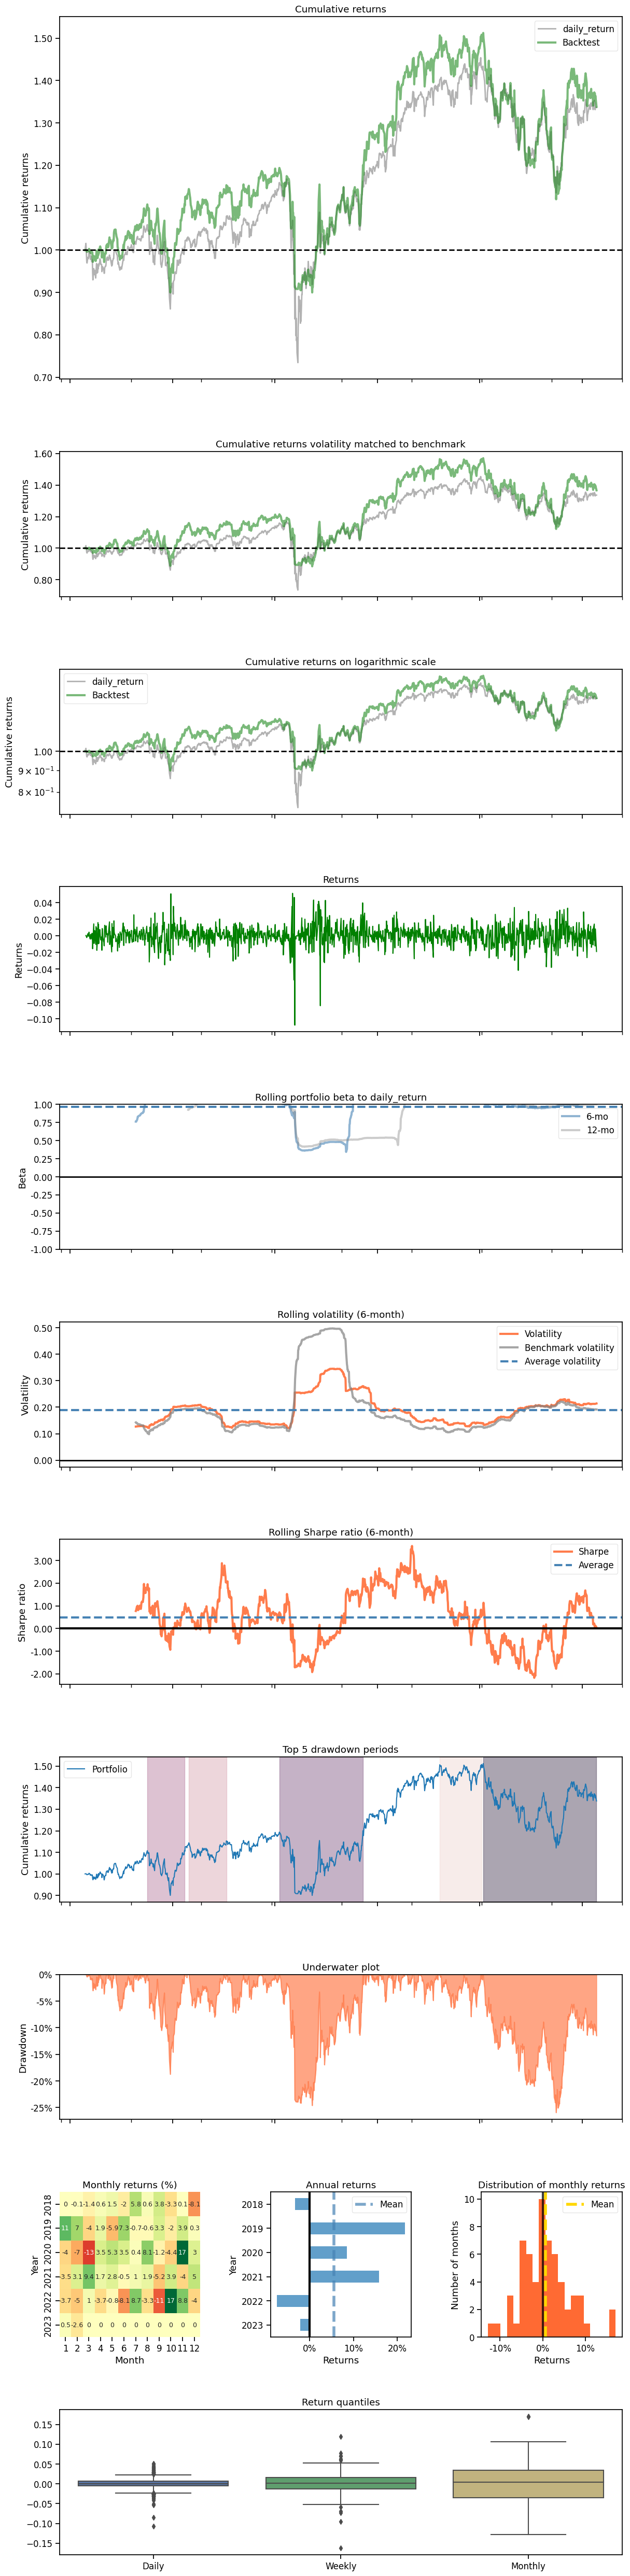

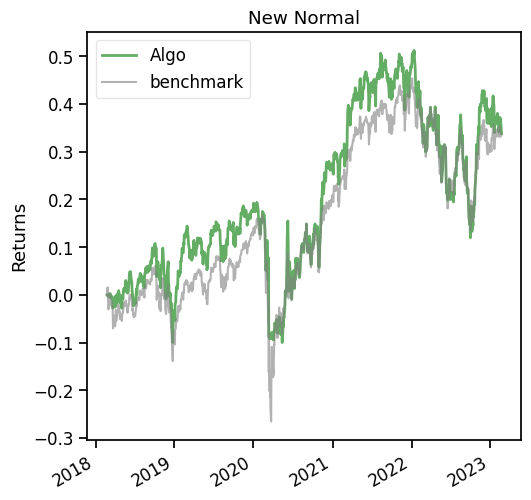

In [47]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value, 
             baseline_ticker = '^DJI', 
             baseline_start = df_account_value.loc[0,'date'],
             baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])